<a href="https://colab.research.google.com/github/ravendickaprio/AnalityX/blob/main/Abulon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ¿Puedes estimar la edad de un abulón?
* Antecedentes

---


Estás trabajando como pasante para una operación de cultivo de abulón en Japón. Por razones operativas y ambientales, es una consideración importante estimar la edad de los abulones cuando van al mercado.

Determinar la edad de un abulón implica contar el número de anillos en una sección transversal de la concha a través de un microscopio. Dado que este método es algo engorroso y complejo, le interesa ayudar a los agricultores a estimar la edad del abulón utilizando sus características físicas.



Características del abulón:
* "sexo" - M, F e I (bebé).
* "longitud" - medida de la concha más larga.
* "diámetro" - perpendicular a la longitud.
* "altura" - medida con carne en el caparazón.
* "whole_wt" - peso de abulón entero.
* "shucked_wt" - el peso de la carne de abulón.
* "viscera_wt" - peso intestinal.
* "shell_wt" - el peso de la cáscara seca.
* "anillos" - número de anillos en una sección transversal de la carcasa.
* "edad" - la edad del abulón: el número de anillos + 1,5





In [9]:
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R


In [10]:
file = 'https://raw.githubusercontent.com/analityxmlv/791328s/main/abalone.csv'
dt = pd.read_csv(file)

In [11]:
dt.head()         # Sirve para mostrar la parte inicial de los datos
                  # dt.head(15) muestra las 15 primeras observaciones
                  # (Existen más funciones importantes y complementarias para ésto)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


¿Cómo cambia el peso con la edad para cada una de las tres categorías de sexo?


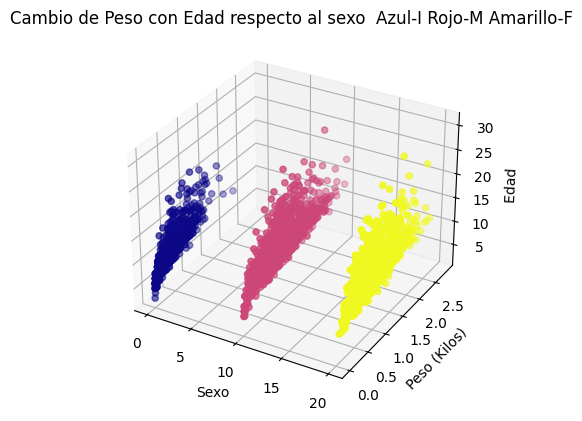

In [12]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dt["sex"].to_numpy()
x_fix =  []
for i in x:
    if i == "M":
      x_fix.append( 10) # 10 to M

    if i == "F":
      x_fix.append( 20) # 20 to F
    if i == "I":
      x_fix.append(0) # 0 to I

x = np.array(x_fix)
z = dt["age"].to_numpy()
y = dt["whole_wt"].to_numpy()

ax.scatter(x, y, z,c=x, cmap="plasma")
ax.set_title("Cambio de Peso con Edad respecto al sexo  Azul-I Rojo-M Amarillo-F")
ax.set_xlabel('Sexo')        # Etiqueta del eje X
ax.set_ylabel('Peso (Kilos)')       # Etiqueta del eje Y
ax.set_zlabel('Edad ');        # Etiqueta del eje Z (Var.)
plt.show()


¿Puedes estimar la edad de un abulón usando sus características físicas?

In [18]:
new_df = dt[['length','whole_wt','age']].copy()  #Creamos un Dataset Temporal solo con Longitud Peso y Edad
new_df.head()
x1 = new_df["length"]                             # Datos eje X
x2 = new_df["whole_wt"]                             # Datos eje Y
y = new_df["age"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2', data=new_df).fit() # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     956.9
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:32:52   Log-Likelihood:                -10028.
No. Observations:                4177   AIC:                         2.006e+04
Df Residuals:                    4174   BIC:                         2.008e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9313      0.316     15.626      0.0

Extraer los  β
  estimados:

In [19]:
mod.params

Intercept     4.931349
x1           10.582428
x2            1.155035
dtype: float64

 Extraer el  σ2
  estimado:

In [21]:
mod.mse_resid

7.130642221926606

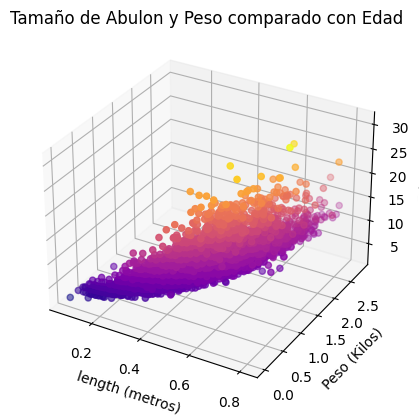

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dt["length"].to_numpy()
z = dt["age"].to_numpy()
y = dt["whole_wt"].to_numpy()

ax.scatter(x, y, z,c=z, cmap="plasma")
ax.set_title("Tamaño de Abulon y Peso comparado con Edad")
ax.set_xlabel('length (metros)')        # Etiqueta del eje X
ax.set_ylabel('Peso (Kilos)')       # Etiqueta del eje Y
ax.set_zlabel('Edad ');        # Etiqueta del eje Z (Var.)
plt.show()

In [23]:
dt.head()         # Sirve para mostrar la parte inicial de los datos
                  # dt.head(15) muestra las 15 primeras observaciones
                  # (Existen más funciones importantes y complementarias para ésto)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [27]:
new_df = dt[['length','rings','age']].copy()  #Creamos un Dataset Temporal solo con Longitud Peso y Edad
x1 = new_df["length"]                             # Datos eje X
x2 = new_df["rings"]                             # Datos eje Y
y = new_df["age"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2', data=new_df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())
print("length','rings','age")
print(mod.mse_resid)

new_df = dt[['length','whole_wt','age']].copy()  #Creamos un Dataset Temporal solo con Longitud Peso y Edad
x1 = new_df["length"]                             # Datos eje X
x2 = new_df["whole_wt"]                             # Datos eje Y
y = new_df["age"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1*x1 + x2*x2', data=new_df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())
print("length','whole_wt','age")
print(mod.mse_resid)

new_df = dt[['length','diameter','age']].copy()  #Creamos un Dataset Temporal solo con Longitud Peso y Edad
x1 = new_df["length"]                             # Datos eje X
x2 = new_df["diameter"]                             # Datos eje Y
y = new_df["age"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2', data=new_df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())
print("length','diameter','age")
print(mod.mse_resid)

new_df = dt[['diameter','whole_wt','age']].copy()  #Creamos un Dataset Temporal solo con Longitud Peso y Edad
x1 = new_df["diameter"]                             # Datos eje X
x2 = new_df["whole_wt"]                             # Datos eje Y
y = new_df["age"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2', data=new_df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())
print("diameter','whole_wt','age")
print(mod.mse_resid)




new_df = dt[['shucked_wt','viscera_wt','age']].copy()  #Creamos un Dataset Temporal solo con Longitud Peso y Edad
x1 = new_df["shucked_wt"]                             # Datos eje X
x2 = new_df["viscera_wt"]                             # Datos eje Y
y = new_df["age"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2', data=new_df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())
print("shucked_wt','viscera_wt','age")
print(mod.mse_resid)


new_df = dt[['diameter','height','age']].copy()  #Creamos un Dataset Temporal solo con Longitud Peso y Edad
x1 = new_df["diameter"]                             # Datos eje X
x2 = new_df["height"]                             # Datos eje Y
y = new_df["age"]                               # Datos eje Z (Var. Respuesta)
mod = smf.ols('y ~ x1 + x2', data=new_df).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())
print("diameter','height','age")
print(mod.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.882e+32
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:42:21   Log-Likelihood:             1.2932e+05
No. Observations:                4177   AIC:                        -2.586e+05
Df Residuals:                    4174   BIC:                        -2.586e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5000    6.1e-16   2.46e+15      0.0